<span style="color:gray;">Quantum Mechanics Review  + Practice w/Python  |  Chris Williams |   Jan 25, 2017 </span>
# Quantum Mechanics in Jupyter

### 2 Resonant Tunneling Diodes
---
Lets try a more interesting potential and see how a similar wavepacket evolves with time when it is given the opportunity to propogate through space. The potential of a resonant tunneling diode has two potential barriers seperated by a small gap.

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import plotly.plotly as py

from ipywidgets import *
from matplotlib import animation, rc
from IPython.display import HTML

a = 100e-9
me = 9.11e-31
hbar = 1.055e-34
n = 2000
eV = 1.602e-19       #1 electron volt in units of J

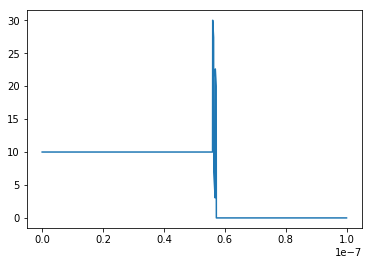

In [4]:
#Manually build double barrier potential
x = np.linspace(0, a, n)
V0 = np.concatenate((np.zeros(1120), 20*np.ones(7), np.zeros(10), 20*np.ones(7), np.zeros(856)))
U0 = 10;
V =  np.concatenate((U0*np.ones(1120), U0*np.linspace(24, 0, 24)/24*np.ones(24), np.zeros(856))) + V0;

#Preview potential
plt.plot(x, V);

dx = 2*a/n

#Create tridiagonal Laplacian for Hamiltonian (TODO: use diag insead?)
def hamiltonian2(N, V, m):
    
    U = np.zeros((N,N))
    
    
    for i in range(0,N):
        U[i,i]= -2
        if i > 0:
            U[i, i-1] = 1
        if i < N-1:
            U[i,i+1] = 1

    #Compute Hamiltonian and solve eigenvalue problem
    return -(hbar**2/(2*m*eV))*U/dx**2 + np.diag(V)

#Find eigenfunctions 
E,phi = np.linalg.eigh(hamiltonian2(n, V, me))
gau = np.sqrt(mlab.normpdf(x, 50e-9, 1e-9))/np.sqrt((n-1)/a)*np.exp(5*1j*x/hbar)

c_n = np.conj(gau).dot(phi)
Psi = c_n.dot(phi)

np.size(Psi)

nt = 400
t = np.linspace(0, 2000*1.2496e-17, nt)
z = np.zeros((n,n),      dtype=complex)
Psi_t = np.zeros((nt,n), dtype=complex)

for i in range(nt):
    for j in range(n):
        z[:,j] = c_n[j]*(phi[:,j]*np.exp(-1j*E[j]*t[i]/6.5828E-16))
    Psi_t[i, :] = np.sum(z, 1)

In [6]:
%%capture
fig, ax = plt.subplots()

ax.set_xlim(0,1e-7)
ax.set_ylim(-0.15, 0.15)

line, = ax.plot([],[], lw=2)

def init():
    line.set_data([],[])
    return line,

def animate(i):
    y = np.real(Psi_t[i,:])
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nt, interval=50, blit=True)

In [7]:
HTML(anim.to_html5_video())

---
### References
1. [Discretization of 1D Hamiltonian](https://wiki.physics.udel.edu/phys824/Discretization_of_1D_Hamiltonian)
2. [Schrodinger Equation](https://www.wikipedia.com/en/Schr%C3%B6dinger_equation)
3. [Eigenvalues and Eigenfunctions](http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/eigen.html)
4. [A Crash Course in Python for Scientists](http://nbviewer.jupyter.org/gist/rpmuller/5920182)


<span style="color:gray;">Based on projects assigned in University of Waterloo NanoEng Program's Quantum Mechanics course (NE 232 - Instructor/Year: David Corey, 2015). Created as an introduction to using  Python/Jupyter notebooks</span>